<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


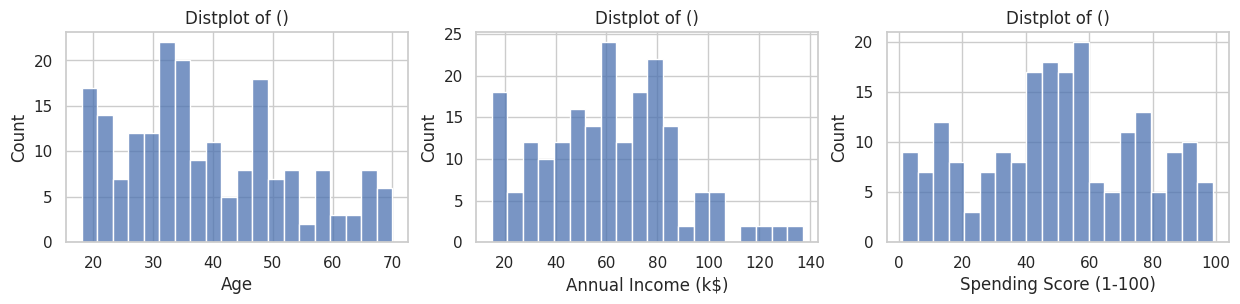

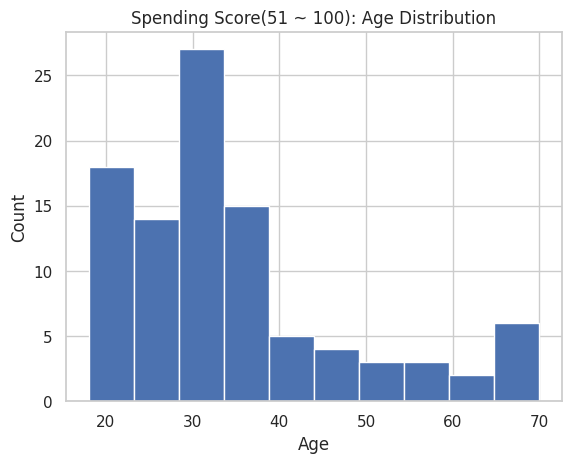

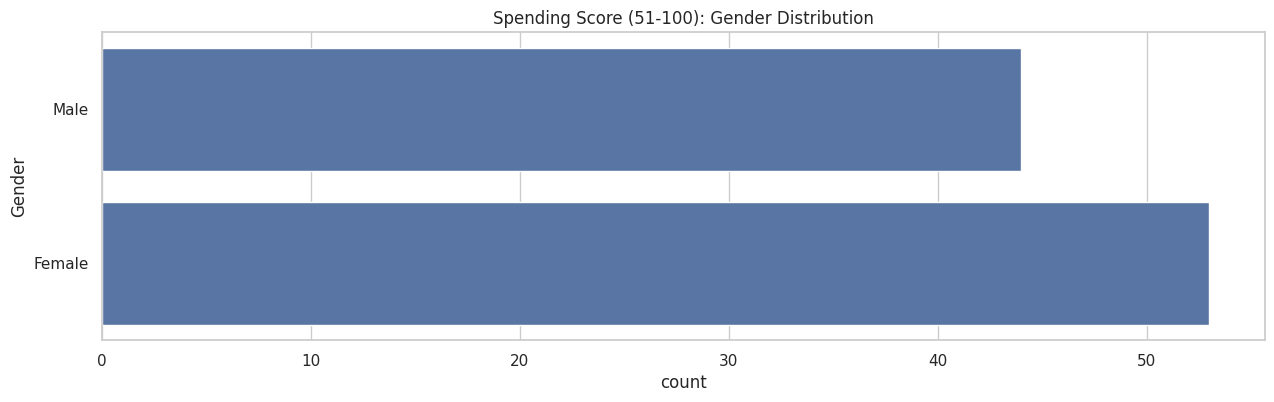

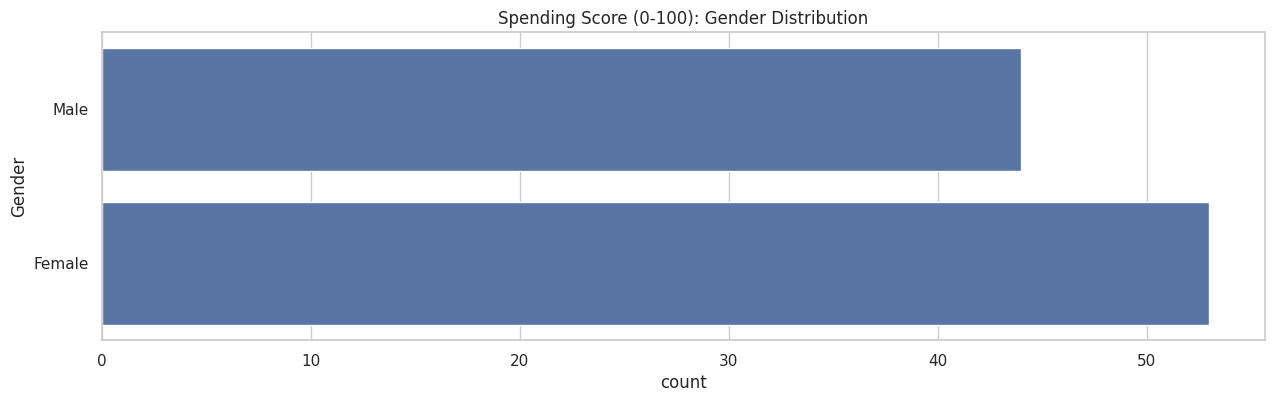

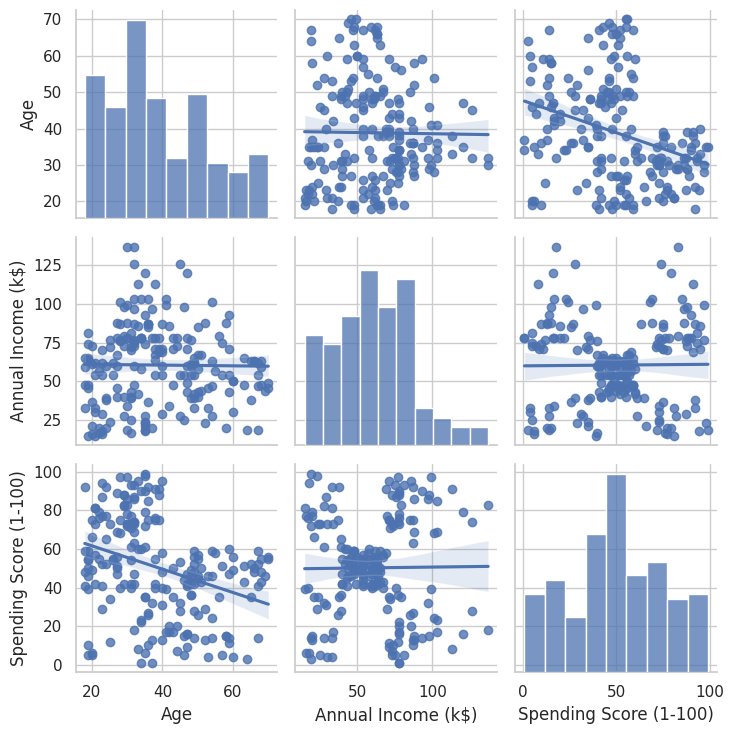

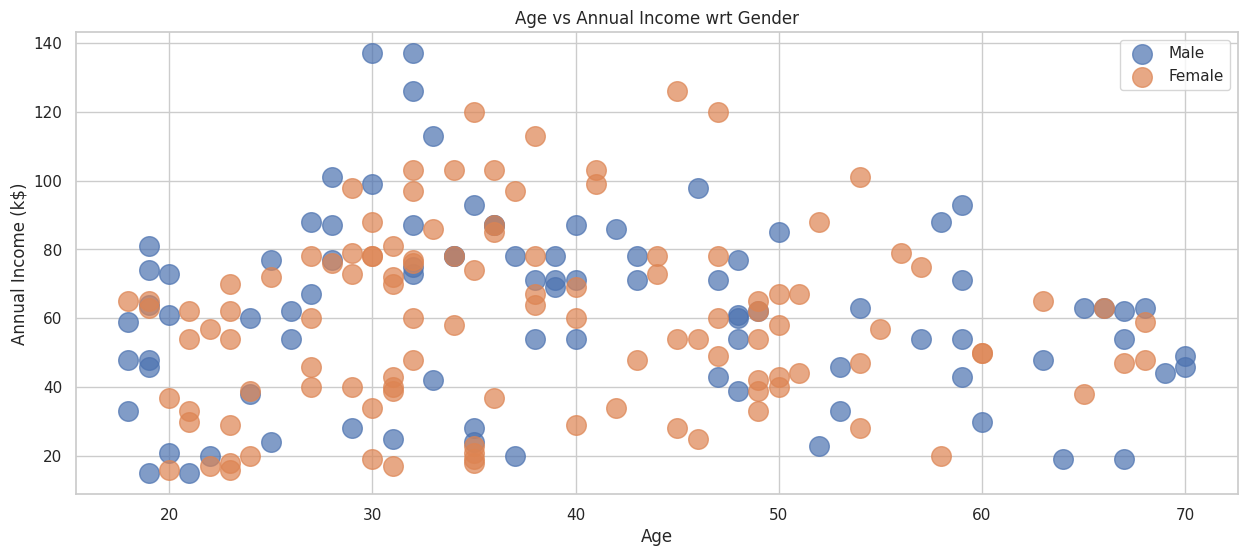

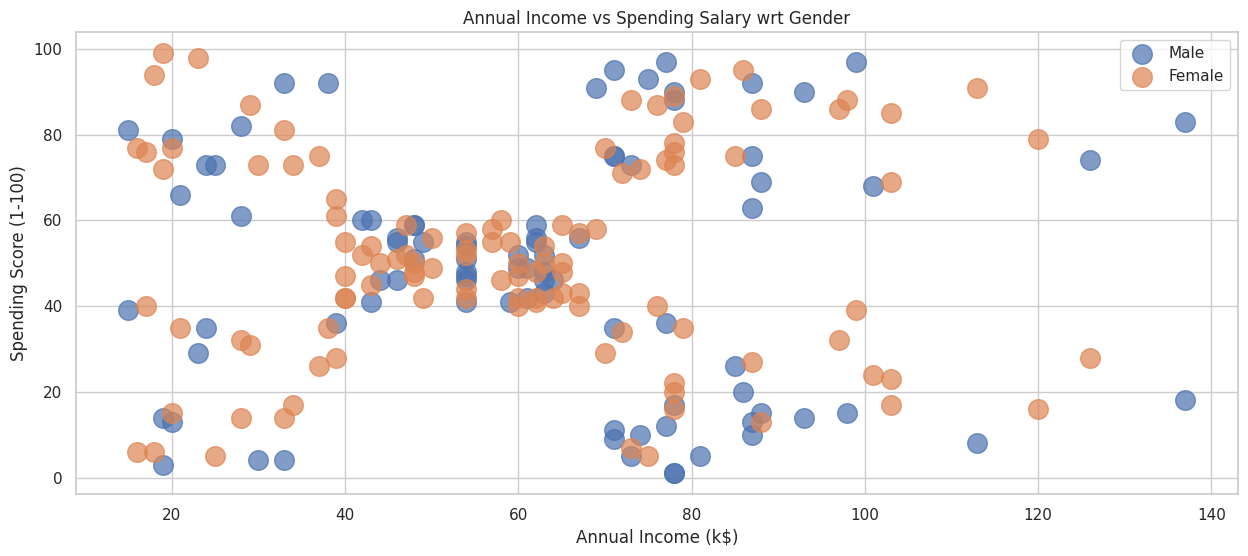

<ipython-input-4-149596f58814>:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cols,y='Gender',data=df,palette='vlag')
<ipython-input-4-149596f58814>:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cols,y='Gender',data=df,palette='vlag')
<ipython-input-4-149596f58814>:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cols,y='Gender',data=df,palette='vlag')


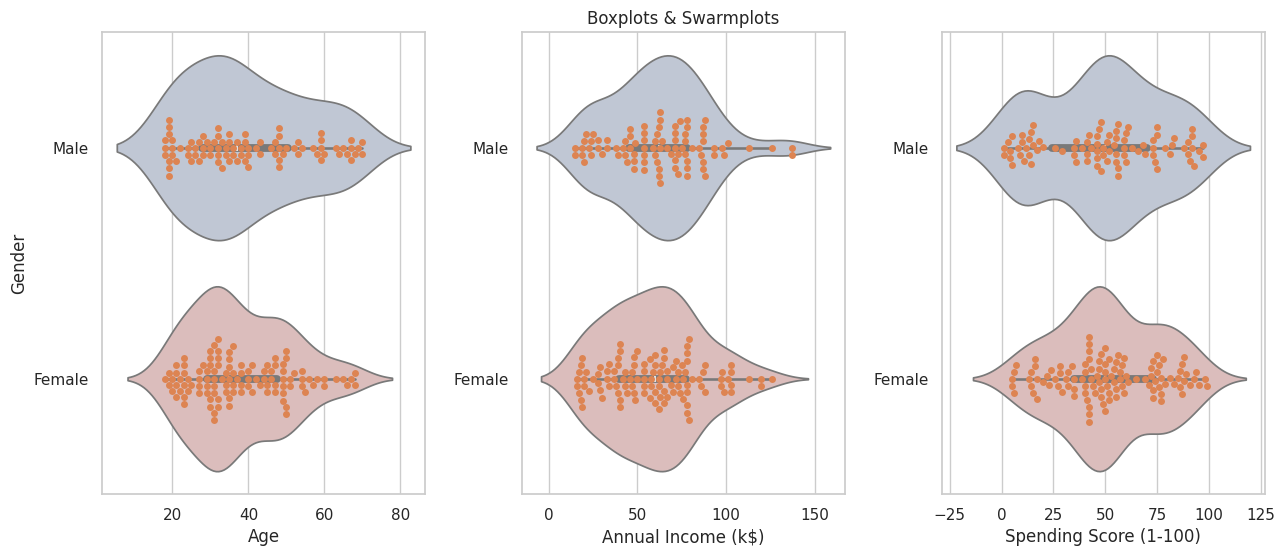

x shape (200, 2)
Inertia: [181363.59595959593, 106348.37306211122, 73679.78903948836]

Silhoutte Scores: [0.2968969162503008, 0.46761358158775435, 0.4931963109249047]


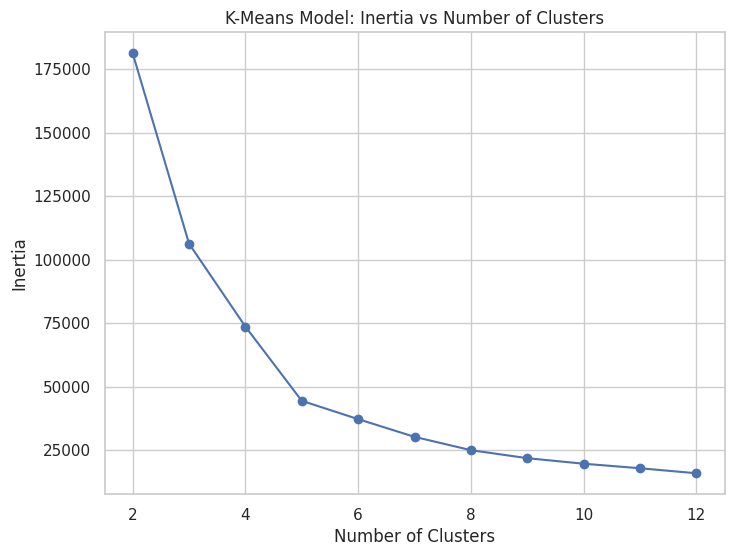

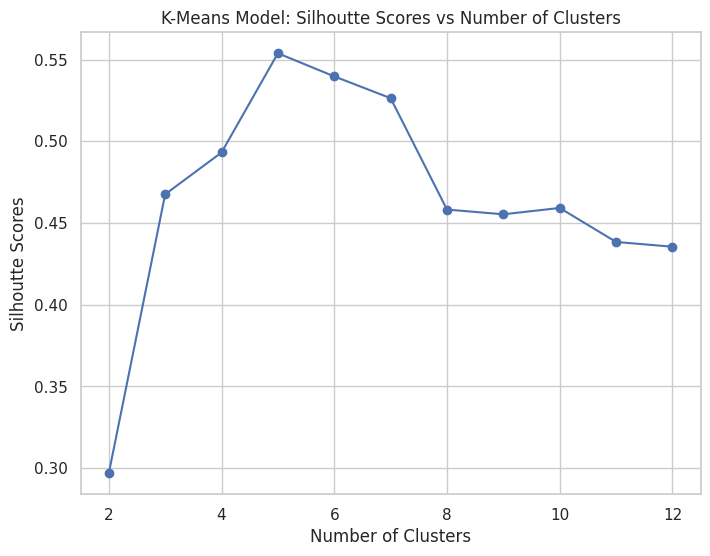

[2 3 2 3 2]
[[55.2962963  49.51851852]
 [88.2        17.11428571]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]
 [86.53846154 82.12820513]]


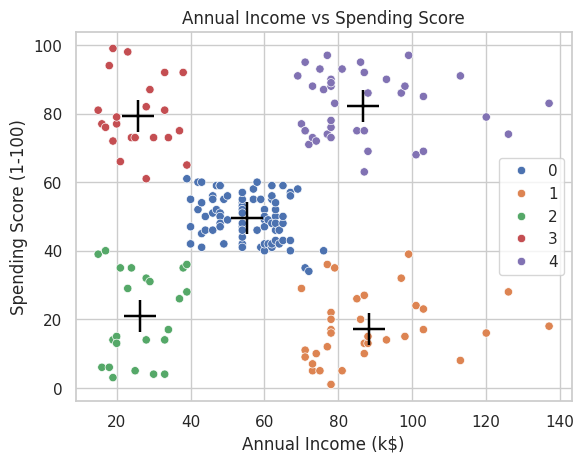

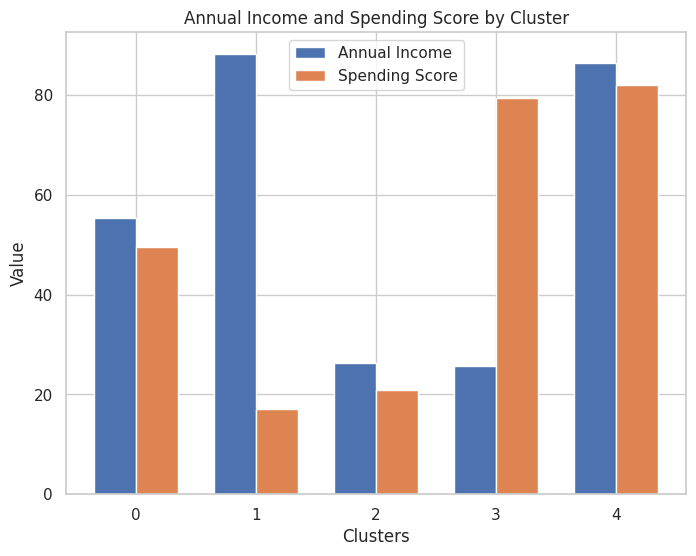

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

df=pd.read_csv('/Mall_Customers.csv')
df.describe()
df.info()

mask = df['Spending Score (1-100)']>50
df_score = df[mask]
df_score.head()
df_score.describe()

plt.figure(figsize = (15,6))
n=0
for x in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    n +=1
    plt.subplot(2,3,n)
    plt.subplots_adjust(hspace=0.2,wspace=0.2)
    sns.histplot(df[x],bins = 20)
    plt.title('Distplot of ()'.format(x))
plt.show();

df_score['Age'].hist()
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Spending Score(51 ~ 100): Age Distribution');

plt.figure(figsize = (15,4))
sns.countplot(y='Gender',data=df_score)
plt.title('Spending Score (51-100): Gender Distribution')
plt.show();

plt.figure(figsize = (15,4))
sns.countplot(y='Gender',data=df_score)
plt.title('Spending Score (0-100): Gender Distribution')
plt.show();

import warnings
warnings.filterwarnings('ignore' , category = UserWarning)
sns.pairplot(df[['Age', 'Annual Income (k$)' , 'Spending Score (1-100)']],kind='reg')
plt.tight_layout()
plt.show();

plt.figure(1,figsize=(15,6))
for gender in ['Male','Female']:
    plt.scatter(x='Age',y='Annual Income (k$)',data=df[df['Gender']==gender],s=200,alpha=0.7,label=gender)
plt.xlabel('Age'),plt.ylabel('Annual Income (k$)')
plt.title('Age vs Annual Income wrt Gender')
plt.legend()
plt.show()

plt.figure(1,figsize=(15,6))
for gender in ['Male','Female']:
    plt.scatter(x='Annual Income (k$)',y='Spending Score (1-100)',data=df[df['Gender']==gender],s=200,alpha=0.7,label=gender)
plt.xlabel('Annual Income (k$)'),plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs Spending Salary wrt Gender')
plt.legend()
plt.show()

plt.figure(1,figsize = (15,6))
n = 0
for cols in ['Age','Annual Income (k$)', 'Spending Score (1-100)']:
    n +=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace = 0.3,wspace = 0.3)
    sns.violinplot(x=cols,y='Gender',data=df,palette='vlag')
    sns.swarmplot(x=cols,y='Gender',data=df)
    plt.ylabel('Gender' if n ==1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show();

x=df.iloc[:,[3,4]]
print(f"x shape {x.shape}")
x.head()

n_clusters=range(2,13)
inertia_errors=[]
silhoutte_scores = []
for k in n_clusters:
    model=KMeans(n_clusters = k,random_state=42,n_init =10)
    model.fit(x)
    inertia_errors.append(model.inertia_)
    silhoutte_scores.append(silhouette_score(x,model.labels_))
print("Inertia:",inertia_errors[:3])
print()
print("Silhoutte Scores:",silhoutte_scores[:3])

x_values = list(range(2,13))
plt.figure(figsize=(8,6))
sns.set(style="whitegrid")
plt.plot(x_values,inertia_errors,marker='o',linestyle='-',color='b')
plt.title('K-Means Model: Inertia vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

x_values = list(range(2,13))
plt.figure(figsize=(8,6))
sns.set(style="whitegrid")
plt.plot(x_values,silhoutte_scores,marker='o',linestyle='-',color='b')
plt.title('K-Means Model: Silhoutte Scores vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhoutte Scores')
plt.grid(True)
plt.show()

final_model = KMeans(n_clusters=5,random_state=42,n_init=10)
final_model.fit(x)

labels = final_model.labels_
centroids = final_model.cluster_centers_
print(labels[:5])
print(centroids[:5])

sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'],hue=labels,palette='deep')
sns.scatterplot(
    x=centroids[:,0],
    y=centroids[:,1],
    color='black',
    marker='+',
    s=500)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Annual Income vs Spending Score");
xgb = x.groupby(final_model.labels_).mean()
xgb

plt.figure(figsize=(8,6))
x=[0,1,2,3,4]
x_labels=labels
income_values=xgb['Annual Income (k$)']
spending_values=xgb['Spending Score (1-100)']
bar_width=0.35
index=range(len(x))
plt.bar(index,income_values,bar_width,label='Annual Income')
plt.bar([i+bar_width for i in index],spending_values,bar_width,label='Spending Score')
plt.xlabel('Clusters')
plt.ylabel('Value')
plt.title('Annual Income and Spending Score by Cluster')
plt.xticks([i + bar_width / 2 for i in index], x)
plt.legend()
plt.show()